### Kaggle Titianic Dataset

In [37]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#Sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score 
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

The test dataset excludes the target variable: 'Survived'

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [4]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sage, Miss. Dorothy Edith ""Dolly""",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Describe function tips:

The features that are type objects or strings are categorical and thus don't have certain statistics that are for continous data. Statistics that they don't have : mean, standard deviation, minimum, quartiles and max.

There are statistics for categorical variables only (not for continous features): unique, top, freq.

Count statistic can be used for features and is useful to get an idea of null values.

To get describe tables automatically broken down between continous and categorical features:

In [5]:
#continous features only
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#categorical features only
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Dorothy Edith ""Dolly""",male,347082,G6,S
freq,1,577,7,4,644


#### Getting to know your features:

1. PassengerID, random unique identifiers that can be excluded from the analysis
2. Survived, dependant variable
3. Pclass is an ordinal datatype which can be used as a proxy for Socio Economic Status (SES)
4. Name is a nominal datatype that may be used in feature engineering
5. Sex is a nominal datatype that will converted into dummy variables
6. Age is a continous quantitative variable 
7. SibSp represents the number of sibling or spouses on board
8. Parch represents the number of parents or children on board
9. Ticket is a random variable that can be excluded in the analysis
10. Fare is a continous variable that be used to indicate the section of ship the passenger was situated in
11. Cabin is a nominal datatype which may have been useful but contains a high number of Null values
12. Embarked is a nominal datatype with two null values that may need to be dealt with

### Cleaning

#### Null Values

In [7]:
print('Train columns with null values:\n',train_df.isnull().sum())
print('-'*40)
print('Test columns with null values:\n',test_df.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
Test columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Cleaning made a list of both dataframes to loop through and make changes to both dataframes

In [8]:
# combine the dataframes for cleaning
entire_dataset = [train_df,test_df]

Replacing Null Values:

In [9]:
for dataset in entire_dataset:
    #Age Cleaning: fillna method applied to the pandas series object. Taking the median of the Age series
    dataset['Age'].fillna(dataset['Age'].median(),inplace= True)
    
    #Embarked: fillna method applied to the series object. Taking the mode of the Embarked series
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace= True)
    
    #Fare: fillna method appiled to the series object. Taking the median fare
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace= True)

    

Deleting columns unused in the analysis:

In [10]:
drop_columns = ['PassengerId','Ticket','Cabin']

for dataset in entire_dataset:
    dataset = dataset.drop(drop_columns, axis=1, inplace=True)

### Feature Engineering

Family Size Feature = SibSp (Sibling or spouse) + Parch (Parents & children)

In [11]:
for dataset in entire_dataset:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

IsAlone Feature. Using numpy's where method function to input 1 where the familysize is 0 and 0 if the family size is not 0

In [12]:
for dataset in entire_dataset:
    dataset['IsAlone'] = np.where(dataset['FamilySize']==0,1,0)

Title Feature: extracting out the title from the name column and replacing Titles that appear less than 10 times as 'Misc'

In [13]:
for dataset in entire_dataset:
    dataset['Title'] = dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]

In [14]:
train_df['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Don               1
 Capt              1
 Lady              1
 Ms                1
 Jonkheer          1
 Mme               1
 the Countess      1
 Sir               1
Name: Title, dtype: int64

Any Titles that occur less than ten times are replaced as 'Misc' in train and test data frames

In [15]:
for dataset in entire_dataset:
    dataset['Title'] = dataset['Title'].apply(lambda x: x if x in [' Mr', ' Miss', ' Mrs', ' Master'] else 'Misc')

### Binning Contious Features

In this next step I 'bin' the continous features Age and Fare to make them categorical. This is a new approach I learnt on Kaggle and am curious to see its results on accuracy scores.

In [16]:
for dataset in entire_dataset:
    # cut is based on values of the data, not its frequencies
    dataset['Age_Bin'] = pd.cut(dataset['Age'].astype(int),5)
    # qcut is based on frequency based on frequency of data. Equal number of datapoints in each bucket
    dataset['Fare_Bin'] = pd.qcut(dataset['Fare'],4)


### Convert Formats

Convert the categorical features to dummy variables to be used in machine learning models

There are two main methods of creating dummy variables.

1. Label Encoding
2. Creating Dummy Features

In [17]:
# Label Encoding

# create the LabelEncoder object and then its fit_transform method on the column that is to be encoded
label = LabelEncoder()

for dataset in entire_dataset:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['Age_Bin_Code'] = label.fit_transform(dataset['Age_Bin'])
    dataset['Fare_Bin_Code'] = label.fit_transform(dataset['Fare_Bin'])  

In [18]:
# Creating Dummy Variables

# Column names of x variables 
data_x = ['Pclass', 'Sex', 'Age','SibSp','Parch','Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']

# Create a new dataframe with all x variables with dummy columns
x_dummy = pd.get_dummies(train_df[data_x])

#Create a new dataframe including the target variable
train_df_dummy = pd.concat([x_dummy,train_df['Survived']],axis=1)

### Double check the data cleaning

In [19]:
train_df.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
Age_Bin          0
Fare_Bin         0
Sex_Code         0
Embarked_Code    0
Title_Code       0
Age_Bin_Code     0
Fare_Bin_Code    0
dtype: int64

In [20]:
train_df_dummy.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
FamilySize       0
IsAlone          0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_ Master    0
Title_ Miss      0
Title_ Mr        0
Title_ Mrs       0
Title_Misc       0
Survived         0
dtype: int64

### Exploratory Analysis with Data Visualizations & Statistics

Exploring the continous variables using Box plots and Historgrams

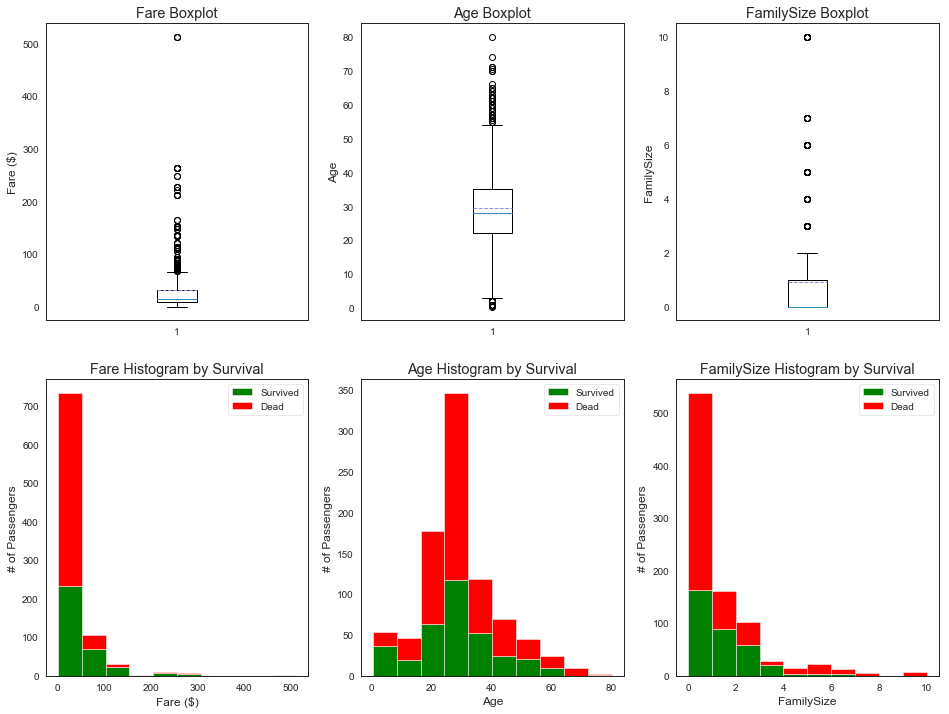

In [21]:
plt.figure(figsize=[16,12])

#Boxplots
plt.subplot(231)
plt.boxplot(x=train_df['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x=train_df['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

plt.subplot(233)
plt.boxplot(x=train_df['FamilySize'], showmeans = True, meanline = True)
plt.title('FamilySize Boxplot')
plt.ylabel('FamilySize')

#Histogram
plt.subplot(234)
plt.hist(x = [train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [train_df[train_df['Survived']==1]['FamilySize'], train_df[train_df['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize')
plt.ylabel('# of Passengers')
plt.legend()

plt.show;

Exploring the categorical variables

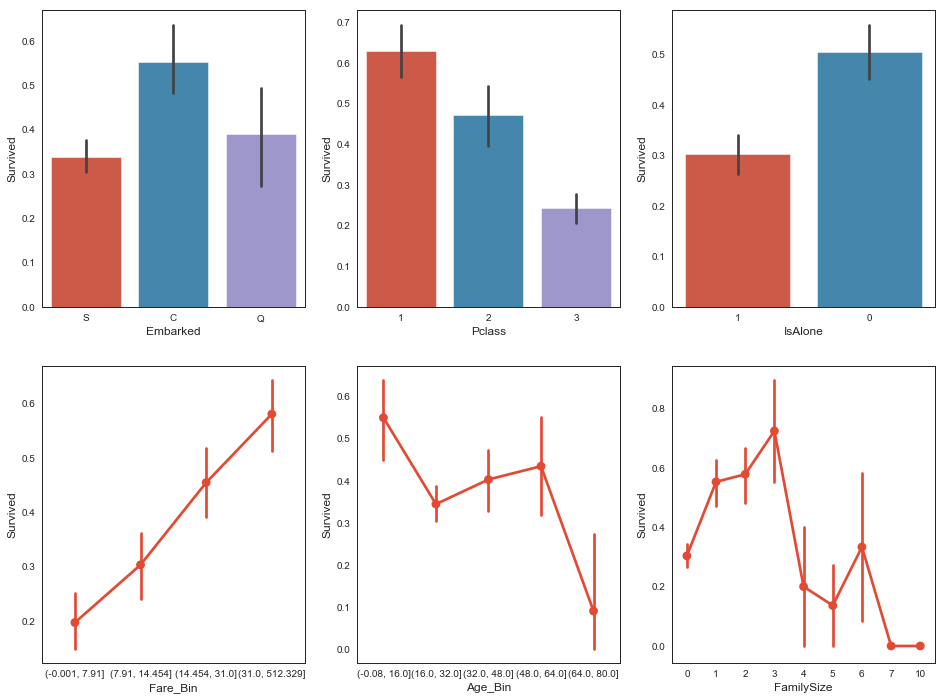

In [22]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=train_df, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_df, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_df, ax = saxis[0,2])

sns.pointplot(x = 'Fare_Bin', y = 'Survived',  data=train_df, ax = saxis[1,0])
sns.pointplot(x = 'Age_Bin', y = 'Survived',  data=train_df, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=train_df, ax = saxis[1,2])
plt.show;

Exploring the qualitiative data: Pclass

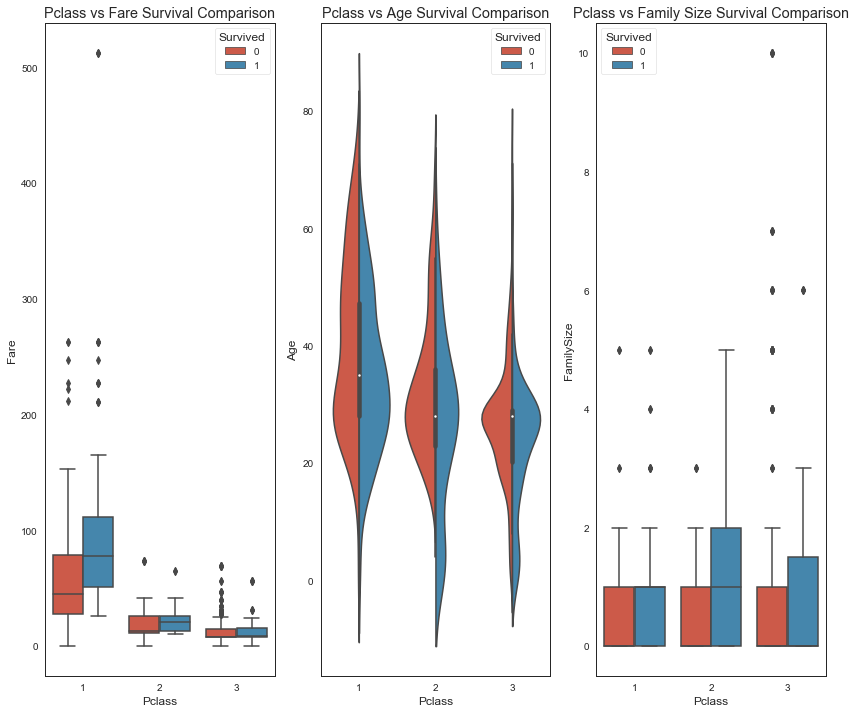

In [23]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train_df, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train_df, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')
plt.show;

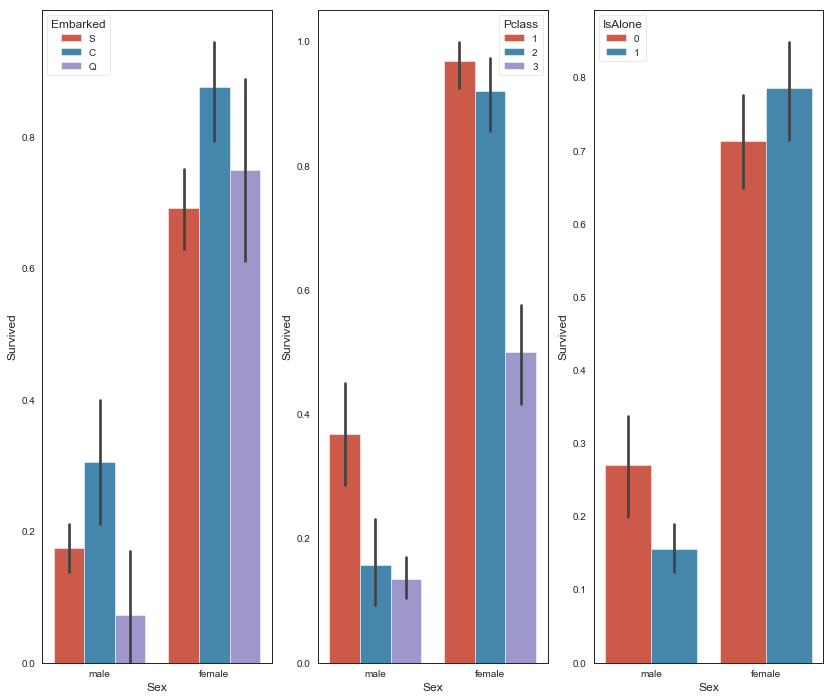

In [24]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature

fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=train_df, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=train_df, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=train_df, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')
plt.show;

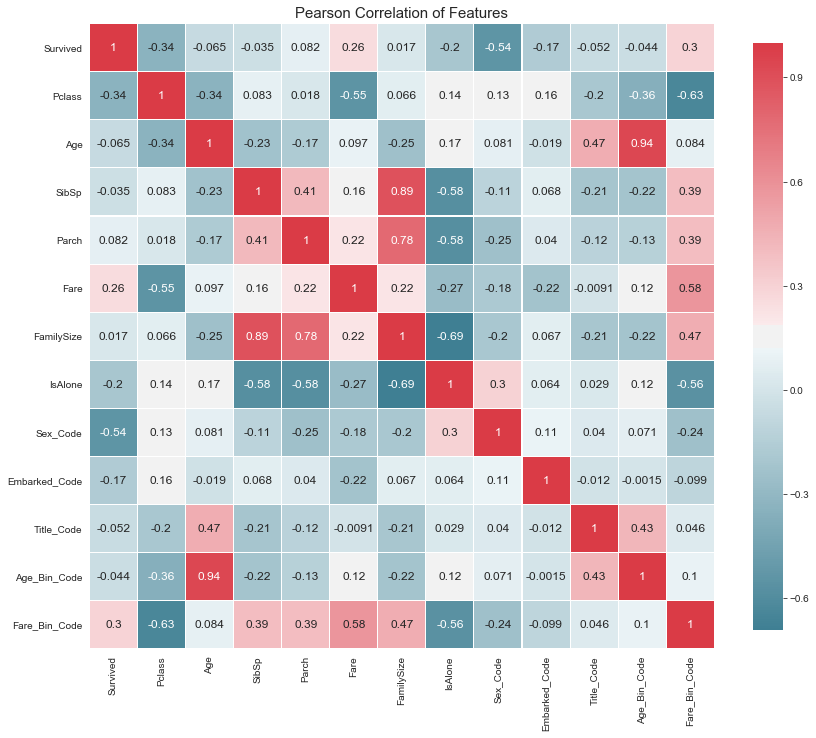

In [25]:
#correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_df)


### Preparing the Data

Splitting the data between the x and y variables.

##### Note: As I am using the grid search object to perform my cross validation, there is no need to split the training data manually.

In [26]:
train_df_dummy_x = train_df_dummy.iloc[:,:-1]
train_df_dummy_y = train_df_dummy.iloc[:,-1]

In [27]:
train_df_bin_x = train_df[['Pclass',
                          'Sex_Code',
                          'Age_Bin_Code',
                          'SibSp',
                          'Parch',
                          'Fare_Bin_Code',
                          'Embarked_Code',
                          'FamilySize',
                         'IsAlone',
                          'Title_Code']]
train_df_bin_y = train_df.iloc[:,0]

### Modeling Data

The machine learning modelling process will be as follows:

1. Create a FeatureUnion object with standard scaler and PCA object as its attributes.

2. Create a Pipeline object with the Feature Union and machine learning algorithim as attributes.

3. Create a dictionary object to be used as an attribute of the Grid Search object.

4. Create a Grid Search object. This object will contain the optimal parameters resulting from the grid search.

5. Fitting the Grid Search object to the training data

### Logistic Regression

Using dataframe in which the the categorical variables are converted to dummy variables

In [28]:
# Feature Union object
preprocess = FeatureUnion([('std', StandardScaler()),('pca', PCA())])

# Pipeline object
pipe = Pipeline([('preprocess',preprocess),
                ("classifier", LogisticRegression())])

# Dictionary 
search_space = [{'preprocess__pca__n_components':[13,14,15,16],
                "classifier__penalty":["l1","l2"],
                "classifier__C": np.logspace(-3,2,10)}]

# Grid Search
logistic_grid = GridSearchCV(pipe,search_space, cv=4, verbose=1, n_jobs=-1)

# Fitting
logistic_grid.fit(train_df_dummy_x,train_df_dummy_y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   11.1s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocess', FeatureUnion(n_jobs=None,
       transformer_list=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))],
       transformer_weights=No...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'preprocess__pca__n_components': [13, 14, 15, 16], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': array([1.00000e-03, 3.59381e-03, 1.29155e-02, 4.64159e-02, 1.66810e-01,
       5.99484e-01, 2.15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [29]:
print(f'Logistic Regression grid search best parameters: {logistic_grid.best_params_}')

print(f'Logistic Regression grid search best cross validation score: {logistic_grid.best_score_}')

Logistic Regression grid search best parameters: {'classifier__C': 0.046415888336127795, 'classifier__penalty': 'l2', 'preprocess__pca__n_components': 13}
Logistic Regression grid search best cross validation score: 0.8237934904601572


Using dataframe in which the the categorical variables are binned and label encoded

In [35]:
# Feature Union object
preprocess = FeatureUnion([('std', StandardScaler()),('pca', PCA())])

# Pipeline object
pipe = Pipeline([('preprocess',preprocess),
                ("classifier", LogisticRegression())])

# Dictionary 
search_space = [{'preprocess__pca__n_components':[7,8,9,10],
                "classifier__penalty":["l1","l2"],
                "classifier__C": np.logspace(-3,2,10)}]

# Grid Search
logistic_grid_bin = GridSearchCV(pipe,search_space, cv=4, verbose=1, n_jobs=-1)

# Fitting
logistic_grid_bin.fit(train_df_bin_x,train_df_bin_y)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    7.4s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocess', FeatureUnion(n_jobs=None,
       transformer_list=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))],
       transformer_weights=No...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'preprocess__pca__n_components': [7, 8, 9, 10], 'classifier__penalty': ['l1', 'l2'], 'classifier__C': array([1.00000e-03, 3.59381e-03, 1.29155e-02, 4.64159e-02, 1.66810e-01,
       5.99484e-01, 2.15443e+00, 7.74264e+00, 2.78256e+01, 1.00000e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [36]:
print(f'Logistic Regression grid search best parameters: {logistic_grid_bin.best_params_}')

print(f'Logistic Regression grid search best cross validation score: {logistic_grid_bin.best_score_}')

Logistic Regression grid search best parameters: {'classifier__C': 0.1668100537200059, 'classifier__penalty': 'l2', 'preprocess__pca__n_components': 7}
Logistic Regression grid search best cross validation score: 0.7901234567901234


In [31]:
train_df_bin_x.head(2)

,Pclass,Sex_Code,Age_Bin_Code,SibSp,Parch,Fare_Bin_Code,Embarked_Code,FamilySize,IsAlone,Title_Code
0,3,1,1,1,0,0,2,1,0,2
1,1,0,2,1,0,3,0,1,0,3


Both the models have used the lowest dimensionality in the grid search search space to obtain its highest score. This is an interesting observation which may suggest that some of the variables have very little predictive power.

The dataframe which has used dummy variables for the categorical variable also has a higher accuracy score. 

It should be noted however that this is a very small dataset.

### K Nearest Neighbors

As this classifier is heavily dependant on the number of neighors hyper parameter we will plot out its accuracy scores while iterating over the number of neighbours.

There is 'data leakage' in the below procedure as the scaling is done prior to the cross validation.

The number of neighbours is divided by 10 as we are cross validating over 10 folds thus the maximum number of neigbhbors in the validation set is total observations divided by 10.

In [63]:
scaler = StandardScaler()
train_df_dummy_scaled_x = scaler.fit_transform(train_df_dummy_x)

In [100]:
#Store the results
validation_score_list = []

# iterate over the total number of neighbors when making the . The 0 index item in shape is the rows / observations
for neighbours in range(1,round(train_df_dummy_scaled_x.shape[0]/10)):
    KNN_model = KNeighborsClassifier(n_neighbors=neighbours,n_jobs=-1)
    validation_score = np.mean(cross_val_score(KNN_model, train_df_dummy_scaled_x, train_df_dummy_y, cv = 10))
    validation_score_list.append(validation_score)


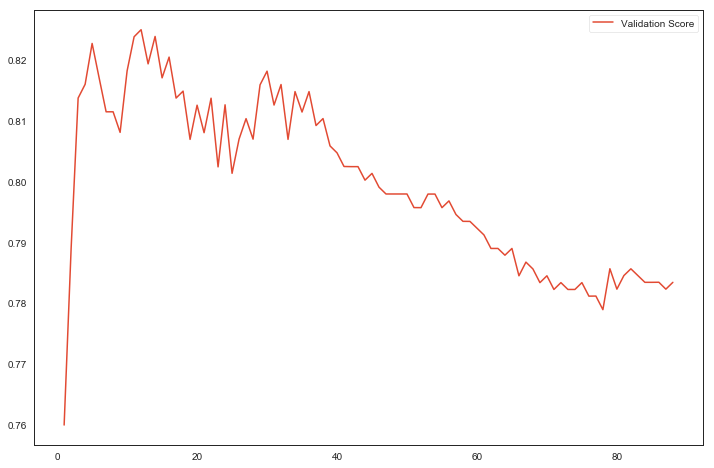

In [101]:
plt.plot(np.arange(1,round(train_df_dummy_scaled_x.shape[0]/10)),validation_score_list,label= 'Validation Score')
plt.legend() 
plt.show()

In [118]:
print(f' The hyper paramater of neighbors that returns the optimum accuracy score is: \
      {validation_score_list.index(max(validation_score_list))}')

 The hyper paramater of neighbors that returns the optimum accuracy score is:       11
